In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the anchor point
def create_vector(anchor, angle):
    anchor_point = np.array(anchor)
    angle_degrees = angle 
    angle_radians = np.deg2rad(angle_degrees)
    vector_length = 1  

    # Calculate the vector components
    vector_x = vector_length * np.cos(angle_radians)
    vector_y = vector_length * np.sin(angle_radians)

    # Create the vector
    vector = np.array([vector_x, vector_y])

    # Calculate the endpoint of the vector
    endpoint = anchor_point + vector

    print("Anchor Point:", anchor_point)
    print("Vector:", vector)
    print("Endpoint:", endpoint)
    
    return vector


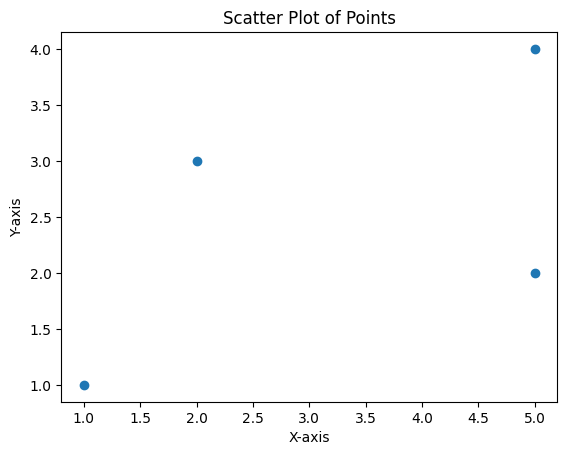

In [6]:
import matplotlib.pyplot as plt

points = [(1, 1), (2, 3), (5, 2), (5, 4)]
x, y = zip(*points)

plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.show()

In [4]:
anchor = (1,1)
angle = 45
v = create_vector(anchor, angle)


Anchor Point: [1 1]
Vector: [0.70710678 0.70710678]
Endpoint: [1.70710678 1.70710678]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def angle_between_vectors(anchor1, angle1, anchor2, angle2):
    def create_vector(anchor_point, angle_degrees):
        angle_radians = np.deg2rad(angle_degrees)
        vector_length = 1  

        # Calculate the vector components
        vector_x = vector_length * np.cos(angle_radians)
        vector_y = vector_length * np.sin(angle_radians)

        # Create the vector
        vector = np.array([vector_x, vector_y])
        return vector

    vector1 = create_vector(anchor1, angle1)
    vector2 = create_vector(anchor2, angle2)

    # Calculate the dot product and magnitudes of the vectors
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the angle between the vectors
    angle_radians = np.arccos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = np.rad2deg(angle_radians)

    # Calculate the distance between the two anchors
    distance_between_anchors = np.linalg.norm(np.array(anchor2) - np.array(anchor1))

    return angle_degrees, vector1, vector2, distance_between_anchors


Angle between vectors: 90.0
Distance between anchors: 1.4142135623730951


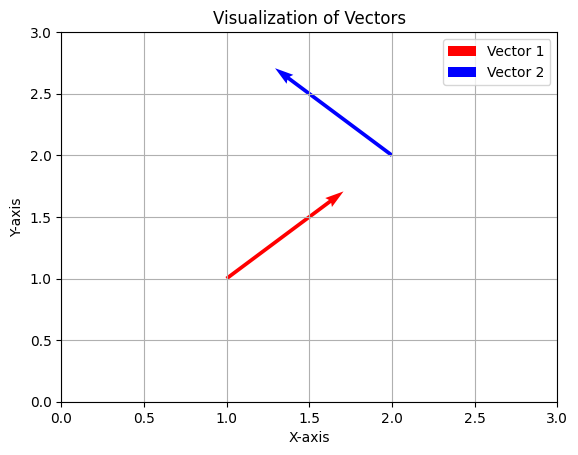

In [13]:

## EXAMPLE
anchor1 = (1, 1)
angle1 = 45
anchor2 = (2, 2)
angle2 = 135

angle_between, vector1, vector2, dist = angle_between_vectors(anchor1, angle1, anchor2, angle2)
print("Angle between vectors:", angle_between)
print("Distance between anchors:", dist)

# Visualize the vectors
plt.figure()
plt.quiver(*anchor1, *vector1, angles='xy', scale_units='xy', scale=1, color='r', label='Vector 1')
plt.quiver(*anchor2, *vector2, angles='xy', scale_units='xy', scale=1, color='b', label='Vector 2')
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of Vectors')
plt.legend()
plt.grid()
plt.show()


In [14]:
def score_probability(angle_degrees, distance):
    # Normalize the angle to be between 0 and 180 degrees
    normalized_angle = min(angle_degrees, 180 - angle_degrees)
    
    # Calculate the angle score (higher score for angles closer to 0 or 180)
    angle_score = 1 - (normalized_angle / 90)
    
    # Calculate the distance score (higher score for shorter distances)
    max_distance = 10  # Assume a maximum distance for normalization
    distance_score = max(0, 1 - (distance / max_distance))
    
    # Combine the angle score and distance score
    probability_score = angle_score * distance_score
    
    return probability_score

# Example usage
angles = [10, 45, 90, 135, 170]
distances = [1, 2, 5, 7, 10]

probabilities = [score_probability(angle, dist) for angle, dist in zip(angles, distances)]
for angle, dist, prob in zip(angles, distances, probabilities):
    print(f"Angle: {angle} degrees, Distance: {dist}, Probability: {prob:.2f}")


Angle: 10 degrees, Distance: 1, Probability: 0.80
Angle: 45 degrees, Distance: 2, Probability: 0.40
Angle: 90 degrees, Distance: 5, Probability: 0.00
Angle: 135 degrees, Distance: 7, Probability: 0.15
Angle: 170 degrees, Distance: 10, Probability: 0.00
